In [1]:
import sys
sys.path.append('.conda/envs/shear/lib/python3.9/site-packages/')

import numpy as np
import astropy.io.fits as pf
import pylab as mplot
import healpy as hp

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

%pylab inline

COLORS = ["f07167","219ebc","c767ac","ffb703","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### load final mask to determine these numbers, these are already healpix maps!

In [3]:
master_mask = hp.read_map('/project/chihway/data/decade/footprint_mask_delve_cs_20240209.fits')

[0 0 0 ... 0 0 0]
23.61211050560454 23.172274593692798 22.57493216695683


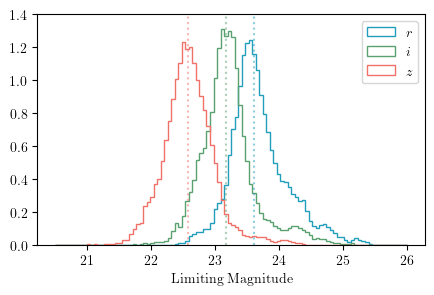

In [8]:
maglim_r = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr311+dr312_r_maglim_Nov28th.fits')
maglim_i = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr311+dr312_i_maglim_Nov28th.fits')
maglim_z = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr311+dr312_z_maglim_Nov28th.fits')

print(master_mask)

maglim_r = maglim_r[master_mask>0]
maglim_i = maglim_i[master_mask>0]
maglim_z = maglim_z[master_mask>0]

mplot.figure(figsize=(5,3))
mplot.hist(maglim_r[maglim_r>0], bins=100, range=(20.5,26), density=True, histtype="step", label = '$r$', color=COLORS[1])
mplot.hist(maglim_i[maglim_i>0], bins=100, range=(20.5,26), density=True, histtype="step", label = '$i$', color=COLORS[4])
mplot.hist(maglim_z[maglim_z>0], bins=100, range=(20.5,26), density=True, histtype="step", label = '$z$', color=COLORS[0])
mplot.xlabel("Limiting Magnitude")

med_r = np.median(maglim_r[maglim_r>0])
med_i = np.median(maglim_i[maglim_i>0])
med_z = np.median(maglim_z[maglim_z>0])

mplot.plot([med_r, med_r], [0,1.4], color=COLORS[1], ls=':', alpha=0.5)
mplot.plot([med_i, med_i], [0,1.4], color=COLORS[4], ls=':', alpha=0.5)
mplot.plot([med_z, med_z], [0,1.4], color=COLORS[0], ls=':', alpha=0.5)

print(med_r, med_i, med_z)

mplot.ylim(0,1.4)
mplot.legend()

plt.savefig('maglim_hist.pdf', facecolor="white", bbox_inches='tight')


In [4]:
airmass_r = hp.read_map('/project/chihway/data/decade/SP_maps/airmass/delve_dr311+dr312_r_airmass_Nov28th.fits')
airmass_i = hp.read_map('/project/chihway/data/decade/SP_maps/airmass/delve_dr311+dr312_i_airmass_Nov28th.fits')
airmass_z = hp.read_map('/project/chihway/data/decade/SP_maps/airmass/delve_dr311+dr312_z_airmass_Nov28th.fits')

airmass_r = airmass_r[master_mask>0]
airmass_i = airmass_i[master_mask>0]
airmass_z = airmass_z[master_mask>0]


print(np.max(airmass_r[airmass_r>0]), np.max(airmass_i[airmass_i>0]), np.max(airmass_z[airmass_z>0]))

2.2715277494972685 2.1471352492173104 2.3980991080383953


1.9367842893216785

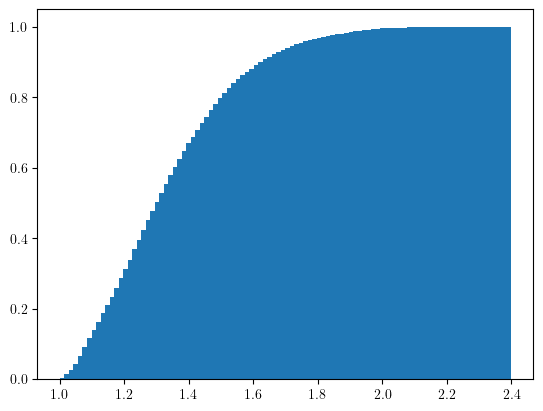

In [16]:
A = mplot.hist(airmass_z[airmass_z>0], bins=100, cumulative=True, density=True)
np.where(A[0]>0.99)
A[1][67]

In [20]:
airmass_r[airmass_r>0]

array([1.25101485, 1.32240754, 1.21184401, ..., 1.25128275, 1.25150397,
       1.24839148])

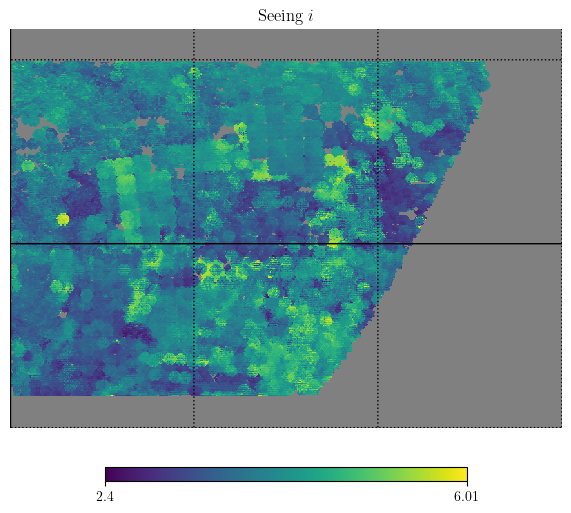

In [10]:
seeing = hp.read_map('/project/chihway/data/decade/SP_maps/fwhm/delve_dr3_1_1_i_fwhm_wmean.fits')

hp.cartview(seeing, nest=True, lonra=[90,180], latra=[-30,35], title='Seeing $i$')
hp.graticule()
mplot.savefig('seeing_i.pdf', bbox_inches='tight')

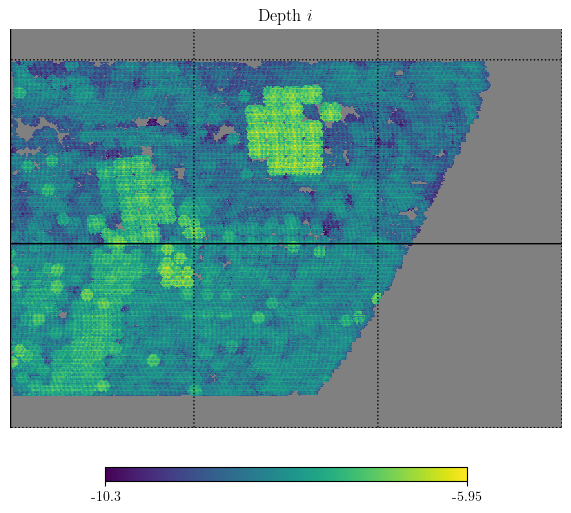

In [11]:
seeing = hp.read_map('/project/chihway/data/decade/SP_maps/maglim/delve_dr3_1_1_i_maglim_wmean.fits')

hp.cartview(seeing, nest=True, lonra=[90,180], latra=[-30,35], title='Depth $i$')
hp.graticule()
mplot.savefig('depth_i.pdf', bbox_inches='tight')